
<h1><center>Predicting diamonds price</center></h1> 

# Part 1: Exploratory data analysis and data visualization

<h2> Diamond is the most precious gemstones in the world. </h2>
<h2>Its price depends on several factors:</h2>
<ol>
<li> Carat: the weight of diamond peice </li>
<li> Cut: the process of converting the mined rough diamonds into gems, whether the cut is fair, good, very good, premium or ideal </li>
<li> Color: according GIA universalized the D-to-Z Color Grading Scale with D (colorless = best) to Z (light yellow = worst) In our dataset from D to J.</li>
<li> Clarity: the absence of inclusions and flaws. The ascending scale is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) </li>
<li> Depth percentage: known by dividing its physical depth measurement by its width</li>
<li> Table: the flat facet on its surface</li>
<li> Additional features: length (x), width (y) and depth (z) all in mm
z in the depth  



<p1>For example, the current diamond price per 1.0 carat ranges from ($2,500 – $18,000) according to Diamond Carat Weight </p1>
<a href='https://www.diamonds.pro/education/diamond-prices/'> Source </a> <p1>(accessed in 28-2-2021 )<p1>
<p1> In our dataset, it ranges from $326 – $18,823 </p1>
<center> <img src='https://yourdiamondguru.com/wp-content/uploads/2018/09/GIA-Cut-Scale.png' >  
<br>
<a href='https://yourdiamondguru.com/grading/depth-and-table-values'> Source </a>
<br>
<center> <img src="diamond-carat-featured.jpg"></center>
<br>
<a href='https://memoryjewellery.com/diamond-guide/diamond-carat/'> Source </a>
</body>
</html>

## Importing libaries

In [14]:
# importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline 
sns.set(rc={'figure.figsize': [10,10]}, font_scale=1.3)

In [15]:
# read the dataset
df = pd.read_csv('diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Getting the data

In [16]:
# cleaning process searching for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


## Dropping first column "Unnamed"

In [17]:
#droping the first column as the data is already index by row index
df.drop('Unnamed: 0', axis=1, inplace = True) 
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## checking for null values

In [18]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## Exploring the categorical features

In [19]:
df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

## Recoding caterogical features

In [20]:
# coding the categories of 'cut' attribute into numbers by mapping method replacing the string by number
df['cut'] = df['cut'].map({'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5})
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int64  
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 4.1+ MB


In [21]:
df['volume'] = df['x'] * df['y'] * df['z']
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,5,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,4,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,2,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,4,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,2,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


## Visualizing distribution of each feature

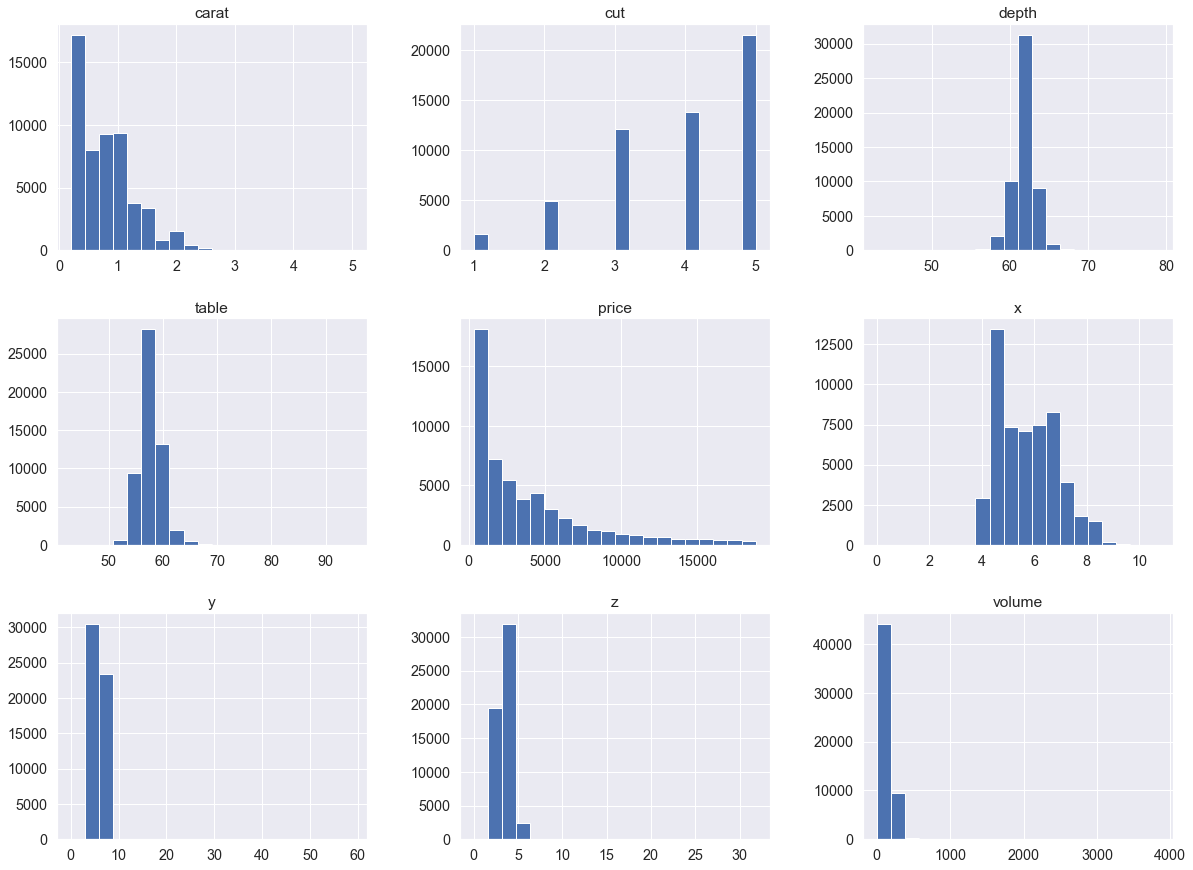

In [22]:
df.hist(bins=20, figsize=(20,15))
plt.show()

<AxesSubplot:xlabel='carat', ylabel='Density'>

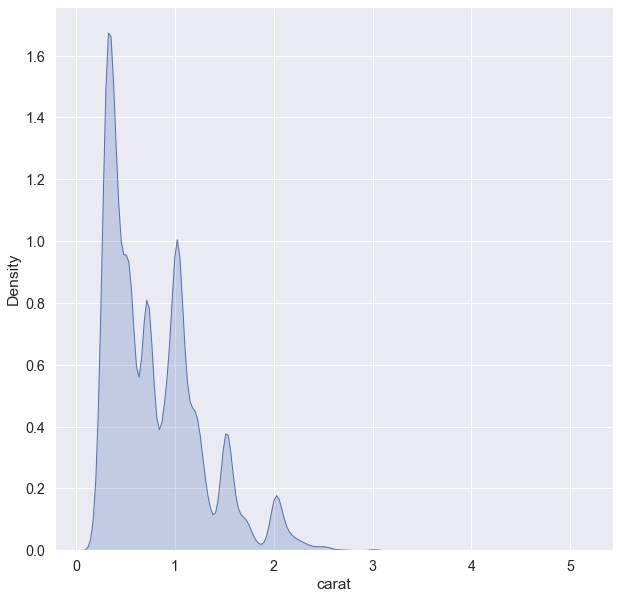

In [23]:
sns.kdeplot(df['carat'], shade=True , palette = 'viridis')

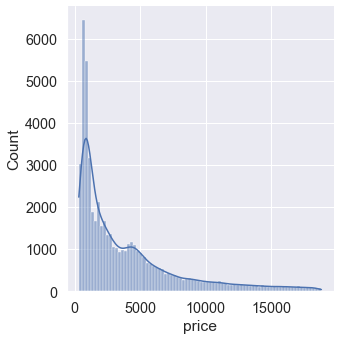

In [24]:
sns.displot(df['price'], kde=True)

<AxesSubplot:xlabel='volume', ylabel='Density'>

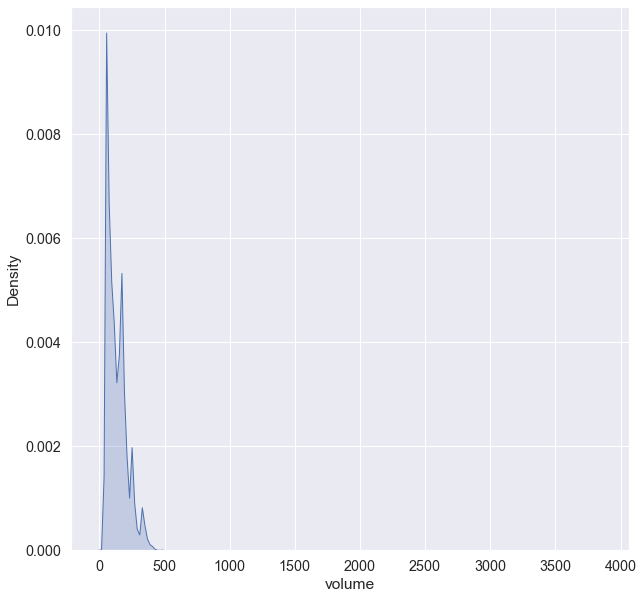

In [25]:
sns.kdeplot(df['volume'], shade=True)

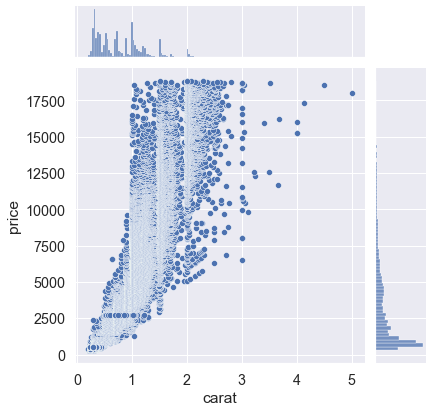

In [27]:
sns.jointplot(x='carat', y='price', data=df)

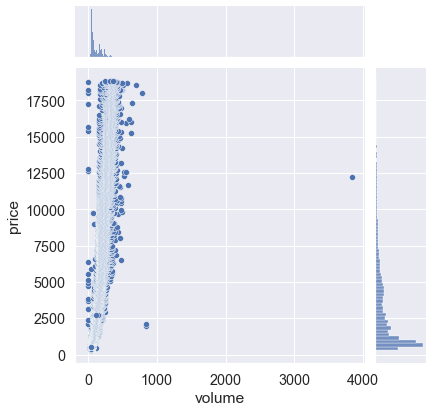

In [28]:
sns.jointplot(x='volume', y='price', data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


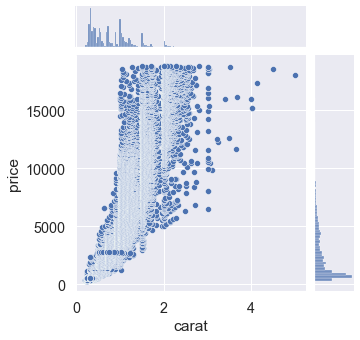

In [29]:
sns.jointplot(x='carat' , y='price' , data=df , size=5)

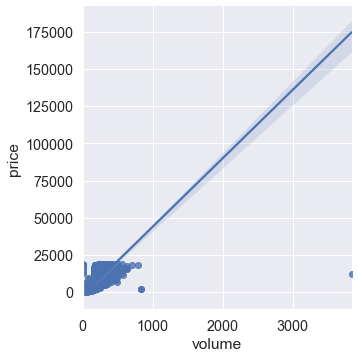

In [30]:
sns.lmplot(x='volume', y='price', data=df)

strong correlation between volume of diamond and the price

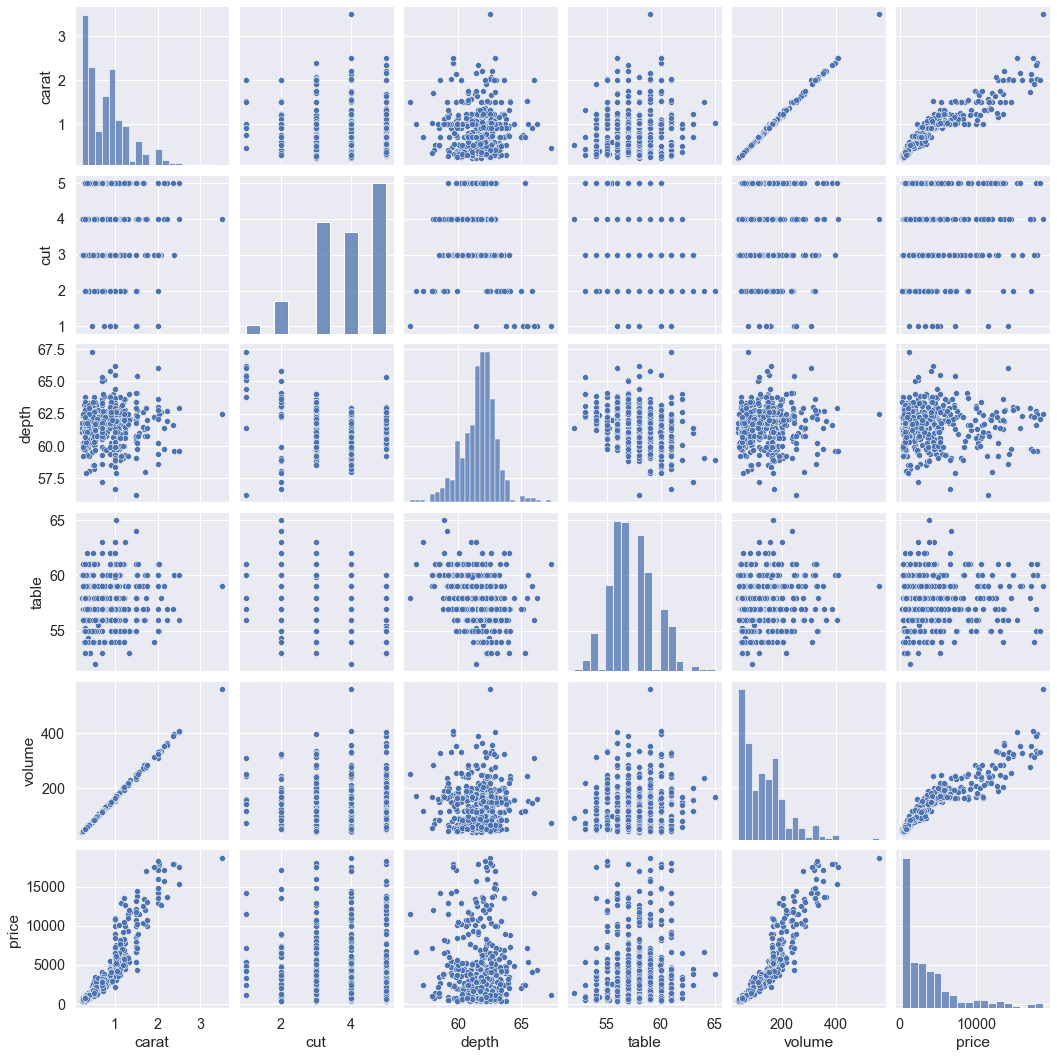

In [31]:
# sns.pairplot(df.sample(500))
sns.pairplot(df.sample(500), vars=['carat', 'cut', 'depth','table','volume', 'price'])

In [32]:
df.describe()

,carat,cut,depth,table,price,x,y,z,volume
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,3.904097,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,129.849403
std,0.474011,1.116600,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,78.245262
min,0.200000,1.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,3.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,65.136830
50%,0.700000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,114.808572
75%,1.040000,5.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,170.842451
max,5.010000,5.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,3840.598060


### features x, y, z contain Zero values, and we should exclude these enteries

## Selecting enteries where x, y or z features are zero

In [33]:
# using loc method and | (or) operator
df.loc[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)]


,carat,cut,color,clarity,depth,table,price,x,y,z,volume
2207,1.00,4,G,SI2,59.1,59.0,3142,6.55,6.48,0.0,0.0
2314,1.01,4,H,I1,58.1,59.0,3167,6.66,6.60,0.0,0.0
4791,1.10,4,G,SI2,63.0,59.0,3696,6.50,6.47,0.0,0.0
5471,1.01,4,F,SI2,59.2,58.0,3837,6.50,6.47,0.0,0.0
10167,1.50,2,G,I1,64.0,61.0,4731,7.15,7.04,0.0,0.0
11182,1.07,5,F,SI2,61.6,56.0,4954,0.00,6.62,0.0,0.0
11963,1.00,3,H,VS2,63.3,53.0,5139,0.00,0.00,0.0,0.0
13601,1.15,5,G,VS2,59.2,56.0,5564,6.88,6.83,0.0,0.0
15951,1.14,1,G,VS1,57.5,67.0,6381,0.00,0.00,0.0,0.0
24394,2.18,4,H,SI2,59.4,61.0,12631,8.49,8.45,0.0,0.0


In [34]:
len(df[(df['x']==0) | (df['y']==0) | (df['z']==0)])

20

## removing these enteries

In [35]:
df = df[(df[['x', 'y', 'z']] !=0).all(axis=1)]

In [36]:
len(df[(df['x']==0) | (df['y']==0) | (df['z']==0)])

0

In [37]:
## checking correlation between different attributes
corr = df.corr()
corr

,carat,cut,depth,table,price,x,y,z,volume
carat,1.000000,-0.134953,0.028259,0.181646,0.921592,0.977779,0.953991,0.961048,0.978280
cut,-0.134953,1.000000,-0.218073,-0.433306,-0.053491,-0.126232,-0.122181,-0.150647,-0.118648
depth,0.028259,-0.218073,1.000000,-0.295733,-0.010729,-0.025017,-0.029069,0.095023,0.009039
table,0.181646,-0.433306,-0.295733,1.000000,0.127245,0.196097,0.184493,0.152483,0.167809
price,0.921592,-0.053491,-0.010729,0.127245,1.000000,0.887231,0.867864,0.868206,0.904255
x,0.977779,-0.126232,-0.025017,0.196097,0.887231,1.000000,0.974918,0.975435,0.958533
y,0.953991,-0.122181,-0.029069,0.184493,0.867864,0.974918,1.000000,0.956744,0.977016
z,0.961048,-0.150647,0.095023,0.152483,0.868206,0.975435,0.956744,1.000000,0.951912
volume,0.978280,-0.118648,0.009039,0.167809,0.904255,0.958533,0.977016,0.951912,1.000000


<AxesSubplot:>

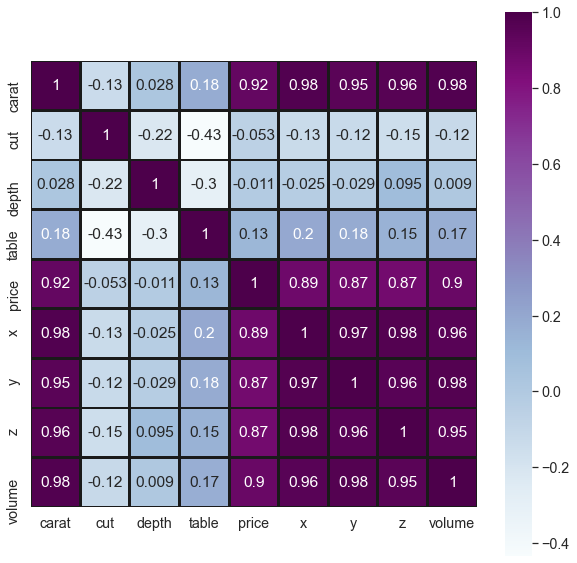

In [38]:
sns.heatmap(data=corr, square=True, annot=True, cmap="BuPu", linecolor='k', linewidths=2)

It is clear from the table and plot the following:
<ol>
<li> The price is strongly correlated with the carat, x, y and z</li>
<li> The price is poorly correlated with table</li>
<li> The price is inversly correlated with depth; i.e. the deeper the diamond, the cheaper they will be </li>

</ol>

# Part 2: Building a prediction model

## Data preprocessing

In [39]:
X = df[['carat', 'cut', 'depth','table','volume']]
y = df['price']

In [40]:
# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)


## Train the model

In [41]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Test model on X_test data

In [42]:
y_pred = model.predict(X_test)
y_pred[:10]

array([7657.72059662,  787.25876915, 4711.83800617,  552.68692684,
       5297.66428298, 5816.65126557, 1235.73274841, 3718.74769529,
        675.5187124 , 1039.43833496])

In [43]:
y_test[:10]

15190    6099
36022     923
7689     4276
34158     854
19285    8008
13982    5694
43025    1372
11305    4981
33222     821
34793     877
Name: price, dtype: int64

## Calculate R2 score

In [44]:
model.score(X_train, y_train)

0.8564463954104913

In [45]:
model.score(X_test, y_test)

0.8465732734982618

## calculate root mean square error

In [46]:
np.sqrt(mean_squared_error(y_test, y_pred))

1576.3897077763797

## Test Random Forest model

In [47]:
rf = RandomForestRegressor(n_estimators = 6)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
mse= mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
rmse

1455.0079741591535

Test DecisionTreeRegressor model

In [48]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse

1778.7680822028472